Представлен датасет центра приюта животных, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).

Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.
7. Не забывайте, что у вас есть PCA (Метод главных компонент). Он может пригодиться.

Вспомните о всем, что я говорил на предыдущих занятиях. Не все будет пригодится, но в жизни вам никто не будет говорить, что использовать :)

Хорошим классификатором для этой задачи будет "Случайный лес" (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Понимать суть работы "леса" не обязательно на данном этапе, но качество предсказаний будет выше, чем с линейным классификатором. (если желаете, вот гайд https://adataanalyst.com/scikit-learn/linear-classification-method/)



In [249]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA

!pip install pandas_profiling
import pandas_profiling

In [250]:
data = pd.read_csv('aac_shelter_outcomes.csv')
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
age_upon_outcome    78248 non-null object
animal_id           78256 non-null object
animal_type         78256 non-null object
breed               78256 non-null object
color               78256 non-null object
date_of_birth       78256 non-null object
datetime            78256 non-null object
monthyear           78256 non-null object
name                54370 non-null object
outcome_subtype     35963 non-null object
outcome_type        78244 non-null object
sex_upon_outcome    78254 non-null object
dtypes: object(12)
memory usage: 7.2+ MB


In [252]:
data.isnull().sum()

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64

In [253]:
data[data['age_upon_outcome'].isnull()]
    

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
68246,NaN,A737705,Dog,Labrador Retriever Mix,Black/White,2013-11-02T00:00:00,2016-11-19T16:35:00,2016-11-19T16:35:00,*Heddy,NaN,NaN,NaN
76825,NaN,A764319,Dog,Pit Bull Mix,Black/White,2016-12-27T00:00:00,2017-12-30T16:47:00,2017-12-30T16:47:00,*Emma,NaN,NaN,Intact Female
77976,NaN,A765547,Bird,Leghorn Mix,White/Red,2017-01-22T00:00:00,2018-01-25T13:23:00,2018-01-25T13:23:00,NaN,Partner,Transfer,Intact Female
78081,NaN,A765899,Dog,Miniature Poodle Mix,Black,2011-01-29T00:00:00,2018-01-29T15:49:00,2018-01-29T15:49:00,NaN,Suffering,Euthanasia,Neutered Male
78114,NaN,A765914,Cat,Domestic Shorthair Mix,Lynx Point,2017-01-29T00:00:00,2018-01-29T18:08:00,2018-01-29T18:08:00,NaN,Suffering,Euthanasia,Intact Male
78162,NaN,A765901,Dog,Maltese Mix,Buff,2017-01-29T00:00:00,2018-01-31T08:14:00,2018-01-31T08:14:00,NaN,Partner,Transfer,Intact Male
78208,NaN,A765960,Dog,Beagle/Catahoula,Tan/White,2010-02-01T00:00:00,2018-02-01T09:21:00,2018-02-01T09:21:00,NaN,Suffering,Euthanasia,Intact Male
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,2018-02-01T18:08:00,NaN,Rabies Risk,Euthanasia,Unknown


Это возраст животного, когда он оказался у хозяина ( я так поняла). Количество таких строк не так и много - 8, и если посмотрим, то и в других столбца есть NaN, я думаю, лучше удалить эти строки.

In [254]:
data = data.loc[pd.isnull(data['age_upon_outcome'])==False, :]
data = data.loc[pd.isnull(data['sex_upon_outcome'])==False, :]

In [255]:
data.isnull().sum()


age_upon_outcome        0
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23880
outcome_subtype     42290
outcome_type           10
sex_upon_outcome        0
dtype: int64

In [256]:
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [257]:
len(data[data['outcome_type'].isnull()])
    

10

In [258]:
data = data.loc[pd.isnull(data['outcome_type'])==False, :]

In [259]:
data.isnull().sum()

age_upon_outcome        0
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23875
outcome_subtype     42280
outcome_type            0
sex_upon_outcome        0
dtype: int64

Наберусь смелости и заявлю, что name - не будет помагать в решение нашей задачи. Я удаляю этот столбец

In [260]:
data = data.drop(['name'], axis=1)


In [261]:
data[data['outcome_subtype'].isnull()]
    

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,outcome_subtype,outcome_type,sex_upon_outcome
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,NaN,Adoption,Neutered Male
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,2014-08-14T18:45:00,NaN,Adoption,Intact Female
10,1 year,A675405,Cat,Domestic Medium Hair Mix,Black/White,2013-03-27T00:00:00,2014-03-28T14:55:00,2014-03-28T14:55:00,NaN,Return to Owner,Spayed Female
13,4 years,A640655,Dog,Miniature Schnauzer/Miniature Poodle,White,2009-04-27T00:00:00,2014-04-25T11:17:00,2014-04-25T11:17:00,NaN,Return to Owner,Spayed Female
14,8 years,A690350,Dog,Labrador Retriever Mix,Black,2006-10-18T00:00:00,2014-10-26T18:20:00,2014-10-26T18:20:00,NaN,Return to Owner,Neutered Male
...,...,...,...,...,...,...,...,...,...,...,...
78248,1 year,A725872,Dog,German Shepherd Mix,Tan/Black,2016-02-03T00:00:00,2018-02-01T18:20:00,2018-02-01T18:20:00,NaN,Return to Owner,Intact Female
78249,2 years,A761265,Dog,Border Collie Mix,Black/Gray,2015-11-01T00:00:00,2018-02-01T18:31:00,2018-02-01T18:31:00,NaN,Return to Owner,Neutered Male
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,2018-02-01T18:06:00,NaN,Adoption,Neutered Male
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,2018-02-01T18:32:00,NaN,Adoption,Spayed Female


In [262]:
data['outcome_subtype'].value_counts()

Partner                19658
Foster                  5558
SCRP                    3211
Suffering               2511
Rabies Risk             2416
Snr                      626
Aggressive               506
Offsite                  367
In Kennel                343
Medical                  259
In Foster                182
Behavior                 142
At Vet                    59
Enroute                   45
Underage                  28
Court/Investigation       18
In Surgery                16
Possible Theft             9
Barn                       3
Name: outcome_subtype, dtype: int64

* Думаю, что заменю NaN на other

In [263]:
data['outcome_subtype']= data['outcome_subtype'].replace(np.nan, 'other')

In [264]:
data.isnull().sum()
 #  КРАСОТА! 

age_upon_outcome    0
animal_id           0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
monthyear           0
outcome_subtype     0
outcome_type        0
sex_upon_outcome    0
dtype: int64

* Столбцы datetime и	monthyear имеют одинаковые значения, уберу один из них - datetime

In [265]:
data = data.drop(['datetime'], axis=1)

In [266]:
data.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'monthyear', 'outcome_subtype', 'outcome_type',
       'sex_upon_outcome'],
      dtype='object')

In [267]:
len(data['animal_id'])


78237

In [268]:
len(data['animal_id'].unique())
# Я вообще-то расчитывала, что они уникальны и собиралась убрать его!  

70841

In [269]:
len(data[data['animal_id'].duplicated(keep=False)])

13256

In [270]:
data_dub = data[data['animal_id'].duplicated(keep=False)]

In [271]:
data_dub['animal_id'].value_counts()

A706536    11
A718223    11
A721033    10
A694501     8
A716018     8
           ..
A724704     2
A727287     2
A675687     2
A708741     2
A744737     2
Name: animal_id, Length: 5860, dtype: int64

In [272]:
data[data['animal_id'] == 'A706536']


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,monthyear,outcome_subtype,outcome_type,sex_upon_outcome
33752,6 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2016-11-29T12:26:00,Partner,Transfer,Neutered Male
38680,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2015-07-30T16:27:00,other,Return to Owner,Neutered Male
44719,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2015-10-28T11:34:00,other,Return to Owner,Neutered Male
48700,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2016-01-11T12:46:00,other,Return to Owner,Neutered Male
54619,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2015-07-03T12:49:00,other,Return to Owner,Neutered Male
57689,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2016-02-22T10:49:00,other,Return to Owner,Neutered Male
63245,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2015-07-20T12:50:00,other,Return to Owner,Neutered Male
63413,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2016-03-29T14:23:00,other,Return to Owner,Neutered Male
66164,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2016-03-18T19:32:00,other,Return to Owner,Neutered Male
68044,5 years,A706536,Dog,English Bulldog,Tan/White,2010-06-30T00:00:00,2015-12-26T13:41:00,other,Return to Owner,Neutered Male


In [273]:
data[data['animal_id'] == 'A718223']

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,monthyear,outcome_subtype,outcome_type,sex_upon_outcome
27693,11 months,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2016-05-04T15:28:00,other,Return to Owner,Neutered Male
30590,7 months,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2016-01-12T15:35:00,other,Return to Owner,Neutered Male
35473,1 year,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2016-12-31T16:49:00,other,Return to Owner,Neutered Male
42759,2 years,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2017-09-20T17:30:00,other,Return to Owner,Neutered Male
48282,1 year,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2017-01-24T14:24:00,other,Return to Owner,Neutered Male
51347,2 years,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2017-12-08T16:25:00,other,Return to Owner,Neutered Male
64987,9 months,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2016-03-11T16:22:00,other,Return to Owner,Neutered Male
74678,2 years,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2017-08-25T11:24:00,other,Return to Owner,Neutered Male
75691,7 months,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2015-12-26T13:52:00,other,Return to Owner,Neutered Male
77105,2 years,A718223,Dog,St. Bernard Rough Coat/Boxer,White/Brown,2015-05-24T00:00:00,2018-01-06T15:55:00,other,Return to Owner,Neutered Male


In [274]:
data[data['animal_id'] == 'A721033']

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,monthyear,outcome_subtype,outcome_type,sex_upon_outcome
27126,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2017-01-28T15:22:00,other,Return to Owner,Neutered Male
31074,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2017-01-10T16:20:00,other,Return to Owner,Neutered Male
43032,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2016-09-12T13:40:00,other,Return to Owner,Neutered Male
47544,9 months,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2016-02-20T16:18:00,other,Return to Owner,Neutered Male
48524,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2017-02-07T17:26:00,other,Return to Owner,Neutered Male
56846,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2017-03-16T12:50:00,other,Return to Owner,Neutered Male
59137,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2016-10-21T18:55:00,other,Return to Owner,Neutered Male
65363,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2016-12-16T11:32:00,other,Return to Owner,Neutered Male
68076,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2016-07-11T17:44:00,other,Return to Owner,Neutered Male
74995,1 year,A721033,Dog,Rat Terrier Mix,Tricolor/Brown Brindle,2015-05-20T00:00:00,2017-02-02T11:19:00,other,Return to Owner,Neutered Male


In [275]:
data[data['animal_id'] == 'A694501']


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,monthyear,outcome_subtype,outcome_type,sex_upon_outcome
24889,7 months,A694501,Dog,Labrador Retriever Mix,Black/White,2014-06-30T00:00:00,2015-02-02T13:55:00,other,Return to Owner,Spayed Female
26422,6 months,A694501,Dog,Labrador Retriever Mix,Black/White,2014-06-30T00:00:00,2015-01-01T17:07:00,other,Return to Owner,Spayed Female
26799,7 months,A694501,Dog,Labrador Retriever Mix,Black/White,2014-06-30T00:00:00,2015-02-07T15:08:00,other,Return to Owner,Spayed Female
38653,1 year,A694501,Dog,Labrador Retriever Mix,Black/White,2014-06-30T00:00:00,2015-12-01T16:28:00,other,Return to Owner,Spayed Female
49030,1 year,A694501,Dog,Labrador Retriever Mix,Black/White,2014-06-30T00:00:00,2015-12-21T16:31:00,other,Return to Owner,Spayed Female
67891,10 months,A694501,Dog,Labrador Retriever Mix,Black/White,2014-06-30T00:00:00,2015-05-12T16:23:00,other,Return to Owner,Spayed Female
72877,1 year,A694501,Dog,Labrador Retriever Mix,Black/White,2014-06-30T00:00:00,2016-01-30T17:34:00,other,Adoption,Spayed Female
76078,1 year,A694501,Dog,Labrador Retriever Mix,Black/White,2014-06-30T00:00:00,2015-10-19T17:28:00,other,Return to Owner,Spayed Female


In [276]:
data[data['animal_id'] == 'A565536']
# один и тот же кот не может жить у двух одновременно хозяинов! Видимо это ошибка

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,monthyear,outcome_subtype,outcome_type,sex_upon_outcome
29395,7 years,A565536,Cat,Domestic Longhair Mix,Brown Tabby,2009-06-26T00:00:00,2017-06-02T16:00:00,other,Adoption,Spayed Female
64673,8 years,A565536,Cat,Domestic Longhair Mix,Brown Tabby,2009-06-26T00:00:00,2017-12-21T18:39:00,other,Adoption,Spayed Female


-  Я думаю, что учитывая тот факт , что мы будем работать с данными outcome_type, значение одних и тех же животных будут портить общую статистику. Я создам дф с без дубликатов. Возьму первое значение и оставлю его в дф. ПО большому счету эти животные - Transfer

In [277]:
data.drop_duplicates(subset = ['animal_id'], keep = 'first', inplace = True)

In [278]:
data.shape

(70841, 10)

In [279]:
data.head()


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,monthyear,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,other,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,Rabies Risk,Euthanasia,Unknown


In [280]:
len(data['animal_id'].unique())

70841

* Думаю, все что полезное можно было извлечь для нашей задачи из данных animal_id, я сделала, теперь можно убрать этот объект.

In [281]:
data = data.drop(['animal_id'], axis=1)

In [282]:
data.shape

(70841, 9)

In [283]:
data.head()

,age_upon_outcome,animal_type,breed,color,date_of_birth,monthyear,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,Partner,Transfer,Intact Male
1,1 year,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Partner,Transfer,Spayed Female
2,1 year,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,other,Adoption,Neutered Male
3,9 years,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Partner,Transfer,Neutered Male
4,5 months,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,Rabies Risk,Euthanasia,Unknown


In [284]:
data['outcome_type'].value_counts()

Adoption           29412
Transfer           22527
Return to Owner    11828
Euthanasia          5912
Died                 672
Disposal             305
Rto-Adopt            127
Missing               42
Relocate              16
Name: outcome_type, dtype: int64

In [285]:
data['sex_upon_outcome'].value_counts()

Neutered Male    24098
Spayed Female    22095
Intact Male       9180
Intact Female     8913
Unknown           6555
Name: sex_upon_outcome, dtype: int64

In [286]:
data.columns

Index(['age_upon_outcome', 'animal_type', 'breed', 'color', 'date_of_birth',
       'monthyear', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [1]:
"""""
А вдруг у животных характер зависит от месяца рождения (как у людей - гороскоп)
Я ввиду новую переменную месяц рождения!
И буду с ней работать

"""""

import re

In [288]:
def month (date_of_):
    return re.sub(r'(\d{4})-(\d\d)-(\d\d)(\w)(\d{2}):(\d{2}):(\d{2})', r'\2', date_of_)

In [289]:
data['month']= data['date_of_birth'].apply(month)

In [290]:
data.head()

,age_upon_outcome,animal_type,breed,color,date_of_birth,monthyear,outcome_subtype,outcome_type,sex_upon_outcome,month
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,Partner,Transfer,Intact Male,07
1,1 year,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Partner,Transfer,Spayed Female,11
2,1 year,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,other,Adoption,Neutered Male,03
3,9 years,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Partner,Transfer,Neutered Male,06
4,5 months,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,Rabies Risk,Euthanasia,Unknown,01


In [291]:
#Думаю смело можно удалять значения date_of_birth и monthyear (как я поняла, что это дата, когда животное отдали),
# но тогда более интересно значение age_upon_outcome - в каком возрасте отдали 
data = data.drop(['monthyear'], axis=1)

In [292]:
data = data.drop(['date_of_birth'], axis=1)

In [293]:
data.head()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,07
1,1 year,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,11
2,1 year,Dog,Pit Bull,Blue/White,other,Adoption,Neutered Male,03
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,06
4,5 months,Other,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,01


In [294]:
data['month'].value_counts()


04    8479
05    7402
03    6607
06    6137
08    6098
07    5987
09    5890
10    5721
12    4797
01    4695
11    4624
02    4404
Name: month, dtype: int64

In [295]:
data.describe()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month
count,70841,70841,70841,70841,70841,70841,70841,70841
unique,46,5,2127,525,20,9,5,12
top,1 year,Dog,Domestic Shorthair Mix,Black/White,other,Adoption,Neutered Male,04
freq,12698,38061,22394,7279,36361,29412,24098,8479


In [296]:
data_month = data.groupby(['month','outcome_type']).count()

In [297]:
data_month.tail(10)

#  Просто интересно!! НО для нашей задачи никакой полезной информации нет.

age_upon_outcome  animal_type  breed  color  \
month outcome_type                                                   
11    Return to Owner              1023         1023   1023   1023   
      Rto-Adopt                       5            5      5      5   
      Transfer                     1311         1311   1311   1311   
12    Adoption                     1971         1971   1971   1971   
      Died                           28           28     28     28   
      Disposal                       18           18     18     18   
      Euthanasia                    402          402    402    402   
      Return to Owner              1087         1087   1087   1087   
      Rto-Adopt                      16           16     16     16   
      Transfer                     1275         1275   1275   1275   

                       outcome_subtype  sex_upon_outcome  
month outcome_type                                        
11    Return to Owner             1023              1023  
      Rto-Adopt                      5                 5  
      Transfer                    1311              1311  
12    Adoption                    1971              1971  
      Died                          28                28  
      Disposal                      18                18  
      Euthanasia                   402               402  
      Return to Owner             1087              1087  
      Rto-Adopt                     16                16  
      Transfer                    1275              1275

In [298]:
data.head()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,07
1,1 year,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,11
2,1 year,Dog,Pit Bull,Blue/White,other,Adoption,Neutered Male,03
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,06
4,5 months,Other,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,01


In [299]:
#data.profile_report()

In [300]:
data['animal_type'].value_counts()

Dog          38061
Cat          28209
Other         4229
Bird           333
Livestock        9
Name: animal_type, dtype: int64

In [301]:
data_month = data.groupby(['animal_type','breed']).count()

In [302]:
data_month.shape

(2127, 6)

In [303]:
data_month.loc[:,['color']].head(10)

color
animal_type breed                 
Bird        African Mix          1
            Bantam Mix           8
            Barred Rock Mix      1
            Bluebird Mix         3
            Budgerigar           1
            Bunting              1
            Catbird Mix          1
            Chicken             22
            Chicken Mix        113
            Cockatiel            1

Я вижу , что есть породы Pigeon и Pigeon Mix. Поведение  животного Смешанной  породы думаю отличается от чистокровного. Объединять нельзя.  

In [304]:
data[data['breed'] == 'Duck']

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month
1617,2 weeks,Bird,Duck,Yellow/Black,Partner,Transfer,Unknown,05
2309,2 weeks,Bird,Duck,Yellow/Black,Partner,Transfer,Unknown,05
2758,2 weeks,Bird,Duck,Yellow/Black,Partner,Transfer,Unknown,05
5661,2 weeks,Bird,Duck,Yellow/Black,Partner,Transfer,Unknown,05
6678,2 weeks,Bird,Duck,Yellow/Black,Partner,Transfer,Unknown,05
8679,2 weeks,Bird,Duck,Yellow/Black,Partner,Transfer,Unknown,05
10039,1 year,Bird,Duck,Brown/Tan,other,Relocate,Unknown,10
14897,2 weeks,Bird,Duck,Yellow/Black,Partner,Transfer,Unknown,05
15593,5 years,Bird,Duck,Black/Green,Partner,Transfer,Intact Female,12
19920,2 weeks,Bird,Duck,Yellow/Black,Partner,Transfer,Unknown,05


In [305]:
data[data['breed'] == 'Duck Mix']

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month
5698,3 weeks,Bird,Duck Mix,Yellow,Partner,Transfer,Unknown,02
6005,3 weeks,Bird,Duck Mix,Yellow,Partner,Transfer,Unknown,02
8758,1 year,Bird,Duck Mix,White,In Kennel,Died,Unknown,04
28524,4 months,Bird,Duck Mix,White,Foster,Adoption,Intact Female,12
29529,1 year,Bird,Duck Mix,Black/White,Partner,Transfer,Unknown,10
31865,5 months,Bird,Duck Mix,White/Black,Partner,Transfer,Unknown,04
33460,2 weeks,Bird,Duck Mix,Yellow,other,Adoption,Unknown,06
43073,6 years,Bird,Duck Mix,Brown/Green,Suffering,Euthanasia,Unknown,06
43171,4 years,Bird,Duck Mix,Tricolor,Suffering,Euthanasia,Unknown,11
44053,6 months,Bird,Duck Mix,Yellow,Partner,Transfer,Unknown,12


In [306]:
# На мой взгляд разные значения нельзя назвать их одной общей породой.
# Кстати увидела явно ошибку в данных ( уточнила в интернете) утки не живут 8 years, надо убрать это значение

data.loc[45196]

age_upon_outcome        8 years
animal_type                Bird
breed                  Duck Mix
color                     Black
outcome_subtype           other
outcome_type           Adoption
sex_upon_outcome    Intact Male
month                        08
Name: 45196, dtype: object

In [307]:
data.drop([45196], inplace=True)

In [308]:
data_ = data.groupby(['animal_type','age_upon_outcome']).count()

In [309]:
data_.head(25)

breed  color  outcome_subtype  outcome_type  \
animal_type age_upon_outcome                                                
Bird        1 month               2      2                2             2   
            1 weeks               4      4                4             4   
            1 year              176    176              176           176   
            18 years              1      1                1             1   
            2 months              7      7                7             7   
            2 weeks              16     16               16            16   
            2 years              47     47               47            47   
            20 years              1      1                1             1   
            25 years              1      1                1             1   
            3 days                1      1                1             1   
            3 weeks               5      5                5             5   
            3 years               6      6                6             6   
            4 days                1      1                1             1   
            4 months              6      6                6             6   
            4 weeks              11     11               11            11   
            4 years               3      3                3             3   
            5 days                2      2                2             2   
            5 months              6      6                6             6   
            5 years               4      4                4             4   
            6 months             25     25               25            25   
            6 years               2      2                2             2   
            7 months              2      2                2             2   
            8 months              2      2                2             2   
            9 months              1      1                1             1   
Cat         0 years              48     48               48            48   

                              sex_upon_outcome  month  
animal_type age_upon_outcome                           
Bird        1 month                          2      2  
            1 weeks                          4      4  
            1 year                         176    176  
            18 years                         1      1  
            2 months                         7      7  
            2 weeks                         16     16  
            2 years                         47     47  
            20 years                         1      1  
            25 years                         1      1  
            3 days                           1      1  
            3 weeks                          5      5  
            3 years                          6      6  
            4 days                           1      1  
            4 months                         6      6  
            4 weeks                         11     11  
            4 years                          3      3  
            5 days                           2      2  
            5 months                         6      6  
            5 years                          4      4  
            6 months                        25     25  
            6 years                          2      2  
            7 months                         2      2  
            8 months                         2      2  
            9 months                         1      1  
Cat         0 years                         48     48

In [310]:
#  Можно было бы убрать единичные значения, 
# но я могу только через обращение к каждому значению, это долго если рассматривать в размере всего дф по каждому виду. 

In [311]:
def days (age_upon):
    x=int
    x = int(re.sub(r'(\b\d+)(\s)(\w+)',r'\1', age_upon))
    y = re.sub(r'(\b\d+)(\s)(\w+)',r'\3', age_upon)
    if y == 'years':
        y = 365
    elif y == 'year':
        y = 365    
    elif y == 'months':
        y = 30
    elif y == 'month':
        y = 30
    elif y == 'week':
        y = 7
    elif y == 'weeks':
        y = 7    
    elif y == 'day':
        y = 1
    elif y == 'days':
        y = 1
    x= x*y
    return x
# туповатая функция получилась 

In [312]:
age_upon= '6 years'
days(age_upon)


2190

In [313]:
data['days']= data['age_upon_outcome'].apply(days)

In [314]:
data.head(10)

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month,days
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,07,14
1,1 year,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,11,365
2,1 year,Dog,Pit Bull,Blue/White,other,Adoption,Neutered Male,03,365
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,06,3285
4,5 months,Other,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,01,150
5,4 months,Dog,Leonberger Mix,Brown/White,Partner,Transfer,Intact Male,06,120
6,1 year,Other,Squirrel Mix,Tan,Suffering,Euthanasia,Unknown,12,365
7,3 years,Dog,Chihuahua Shorthair Mix,Brown,Partner,Transfer,Spayed Female,11,1095
8,1 month,Cat,Domestic Shorthair Mix,Blue Tabby/White,other,Adoption,Intact Female,06,30
9,3 months,Cat,Domestic Shorthair Mix,White/Black,Offsite,Adoption,Spayed Female,03,90


In [315]:
# И зачем я это сделала!?

In [316]:
data.profile_report()

In [317]:
data[data['sex_upon_outcome']== 'Unknown']

# думаю сложно делать прогноз по Unknown (6555) и Other(4229)

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month,days
4,5 months,Other,Bat Mix,Brown,Rabies Risk,Euthanasia,Unknown,01,150
6,1 year,Other,Squirrel Mix,Tan,Suffering,Euthanasia,Unknown,12,365
20,8 months,Cat,Domestic Shorthair Mix,Brown Tabby/White,SCRP,Transfer,Unknown,07,240
30,2 weeks,Cat,Domestic Shorthair Mix,Black,Partner,Transfer,Unknown,05,14
40,1 year,Other,Bat,Black/Brown,Rabies Risk,Euthanasia,Unknown,07,365
...,...,...,...,...,...,...,...,...,...
78171,2 years,Other,Bat Mix,Black,Rabies Risk,Euthanasia,Unknown,01,730
78200,3 years,Cat,Domestic Shorthair Mix,White/Black,Snr,Transfer,Unknown,01,1095
78206,2 years,Bird,Pheasant Mix,Gold/Brown,Partner,Transfer,Unknown,01,730
78219,2 years,Other,Raccoon Mix,Black/Gray,Medical,Euthanasia,Unknown,02,730


In [318]:

data_result = data.query('(sex_upon_outcome != "Unknown" ) and (animal_type != "Other")')

In [319]:
data_result.head()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month,days
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,07,14
1,1 year,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,11,365
2,1 year,Dog,Pit Bull,Blue/White,other,Adoption,Neutered Male,03,365
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,06,3285
5,4 months,Dog,Leonberger Mix,Brown/White,Partner,Transfer,Intact Male,06,120


In [320]:
data_result['sex_upon_outcome'].value_counts()

Neutered Male    24012
Spayed Female    22013
Intact Male       8927
Intact Female     8709
Name: sex_upon_outcome, dtype: int64

In [321]:
data_result['animal_type'].value_counts()

Dog          37831
Cat          25685
Bird           138
Livestock        7
Name: animal_type, dtype: int64

In [322]:
len(data_result)

63661

In [323]:
data_result.head()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month,days
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,07,14
1,1 year,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,11,365
2,1 year,Dog,Pit Bull,Blue/White,other,Adoption,Neutered Male,03,365
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,06,3285
5,4 months,Dog,Leonberger Mix,Brown/White,Partner,Transfer,Intact Male,06,120


In [324]:
data_result.shape

(63661, 9)

In [325]:
data_result.pivot_table(index ='outcome_type', columns='animal_type',aggfunc ='count').fillna(0.0)

age_upon_outcome                             breed           \
animal_type                 Bird      Cat      Dog Livestock  Bird      Cat   
outcome_type                                                                  
Adoption                    64.0  11977.0  17112.0       1.0  64.0  11977.0   
Died                         0.0    340.0    121.0       0.0   0.0    340.0   
Disposal                    16.0      6.0     12.0       0.0  16.0      6.0   
Euthanasia                  18.0   1204.0   1340.0       0.0  18.0   1204.0   
Missing                      0.0     26.0     14.0       0.0   0.0     26.0   
Return to Owner              4.0   1276.0  10454.0       1.0   4.0   1276.0   
Rto-Adopt                    0.0     32.0     95.0       0.0   0.0     32.0   
Transfer                    36.0  10824.0   8683.0       5.0  36.0  10824.0   

                                   color           ...    month            \
animal_type          Dog Livestock  Bird      Cat  ...      Dog Livestock   
outcome_type                                       ...                      
Adoption         17112.0       1.0  64.0  11977.0  ...  17112.0       1.0   
Died               121.0       0.0   0.0    340.0  ...    121.0       0.0   
Disposal            12.0       0.0  16.0      6.0  ...     12.0       0.0   
Euthanasia        1340.0       0.0  18.0   1204.0  ...   1340.0       0.0   
Missing             14.0       0.0   0.0     26.0  ...     14.0       0.0   
Return to Owner  10454.0       1.0   4.0   1276.0  ...  10454.0       1.0   
Rto-Adopt           95.0       0.0   0.0     32.0  ...     95.0       0.0   
Transfer          8683.0       5.0  36.0  10824.0  ...   8683.0       5.0   

                outcome_subtype                             sex_upon_outcome  \
animal_type                Bird      Cat      Dog Livestock             Bird   
outcome_type                                                                   
Adoption                   64.0  11977.0  17112.0       1.0             64.0   
Died                        0.0    340.0    121.0       0.0              0.0   
Disposal                   16.0      6.0     12.0       0.0             16.0   
Euthanasia                 18.0   1204.0   1340.0       0.0             18.0   
Missing                     0.0     26.0     14.0       0.0              0.0   
Return to Owner             4.0   1276.0  10454.0       1.0              4.0   
Rto-Adopt                   0.0     32.0     95.0       0.0              0.0   
Transfer                   36.0  10824.0   8683.0       5.0             36.0   

                                             
animal_type          Cat      Dog Livestock  
outcome_type                                 
Adoption         11977.0  17112.0       1.0  
Died               340.0    121.0       0.0  
Disposal             6.0     12.0       0.0  
Euthanasia        1204.0   1340.0       0.0  
Missing             26.0     14.0       0.0  
Return to Owner   1276.0  10454.0       1.0  
Rto-Adopt           32.0     95.0       0.0  
Transfer         10824.0   8683.0       5.0  

[8 rows x 28 columns]

- По этой таблице видно, что животных приживших у хозяинов больше чем Transfer. Но в моем понимание что Transfer, что  Return to Owner	- это одно и тоже. Я бы их объеденила, но посколько предсказание именно по Transfer, не буду этого делать.

In [326]:

data_result.pivot_table(index ='month', columns='outcome_type',aggfunc ='count').fillna(0.0)

age_upon_outcome                                    \
outcome_type         Adoption  Died Disposal Euthanasia Missing   
month                                                             
01                     1901.0  23.0      5.0      167.0     3.0   
02                     1763.0  16.0     16.0      182.0     1.0   
03                     2644.0  26.0      2.0      222.0     3.0   
04                     3760.0  64.0      0.0      273.0     9.0   
05                     2999.0  76.0      0.0      274.0     3.0   
06                     2567.0  48.0      0.0      217.0     3.0   
07                     2366.0  45.0      1.0      217.0     5.0   
08                     2581.0  42.0      1.0      188.0     7.0   
09                     2459.0  40.0      1.0      207.0     3.0   
10                     2315.0  34.0      1.0      234.0     3.0   
11                     1856.0  24.0      1.0      183.0     0.0   
12                     1943.0  23.0      6.0      198.0     0.0   

                                                animal_type        ...  \
outcome_type Return to Owner Rto-Adopt Transfer    Adoption  Died  ...   
month                                                              ...   
01                    1044.0      16.0   1179.0      1901.0  23.0  ...   
02                     923.0       3.0   1034.0      1763.0  16.0  ...   
03                    1063.0      16.0   1717.0      2644.0  26.0  ...   
04                    1013.0      14.0   2387.0      3760.0  64.0  ...   
05                    1069.0      15.0   2135.0      2999.0  76.0  ...   
06                     933.0      13.0   1776.0      2567.0  48.0  ...   
07                     890.0      13.0   1821.0      2366.0  45.0  ...   
08                     804.0       5.0   1836.0      2581.0  42.0  ...   
09                     880.0       7.0   1747.0      2459.0  40.0  ...   
10                    1022.0       4.0   1533.0      2315.0  34.0  ...   
11                    1014.0       5.0   1193.0      1856.0  24.0  ...   
12                    1080.0      16.0   1190.0      1943.0  23.0  ...   

             outcome_subtype          sex_upon_outcome                 \
outcome_type       Rto-Adopt Transfer         Adoption  Died Disposal   
month                                                                   
01                      16.0   1179.0           1901.0  23.0      5.0   
02                       3.0   1034.0           1763.0  16.0     16.0   
03                      16.0   1717.0           2644.0  26.0      2.0   
04                      14.0   2387.0           3760.0  64.0      0.0   
05                      15.0   2135.0           2999.0  76.0      0.0   
06                      13.0   1776.0           2567.0  48.0      0.0   
07                      13.0   1821.0           2366.0  45.0      1.0   
08                       5.0   1836.0           2581.0  42.0      1.0   
09                       7.0   1747.0           2459.0  40.0      1.0   
10                       4.0   1533.0           2315.0  34.0      1.0   
11                       5.0   1193.0           1856.0  24.0      1.0   
12                      16.0   1190.0           1943.0  23.0      6.0   

                                                                    
outcome_type Euthanasia Missing Return to Owner Rto-Adopt Transfer  
month                                                               
01                167.0     3.0          1044.0      16.0   1179.0  
02                182.0     1.0           923.0       3.0   1034.0  
03                222.0     3.0          1063.0      16.0   1717.0  
04                273.0     9.0          1013.0      14.0   2387.0  
05                274.0     3.0          1069.0      15.0   2135.0  
06                217.0     3.0           933.0      13.0   1776.0  
07                217.0     5.0           890.0      13.0   1821.0  
08                188.0     7.0           804.0       5.0   1836.0  
09                207.0     3.0          

In [327]:

data_result.pivot_table(index ='outcome_type', columns='age_upon_outcome',aggfunc ='count').fillna(0.0)

animal_type                                                 \
age_upon_outcome     0 years 1 day 1 month 1 week 1 weeks  1 year 10 months   
outcome_type                                                                  
Adoption                 1.0   0.0  1301.0    0.0     0.0  4795.0     571.0   
Died                     1.0   5.0   118.0    4.0     8.0    27.0       3.0   
Disposal                 0.0   0.0     0.0    0.0     0.0    23.0       0.0   
Euthanasia               2.0   0.0   216.0    7.0     3.0   331.0      12.0   
Missing                  0.0   0.0     1.0    0.0     0.0     6.0       1.0   
Return to Owner          1.0   7.0    50.0    0.0     8.0  1923.0     132.0   
Rto-Adopt                0.0   0.0     0.0    0.0     0.0    32.0       3.0   
Transfer                24.0  48.0  1494.0  166.0   263.0  3313.0     297.0   

                                              ... sex_upon_outcome         \
age_upon_outcome 10 years 11 months 11 years  ...          5 years 6 days   
outcome_type                                  ...                           
Adoption            274.0     219.0    105.0  ...            747.0    0.0   
Died                 18.0       0.0      5.0  ...              6.0    5.0   
Disposal              1.0       0.0      0.0  ...              1.0    0.0   
Euthanasia          112.0       4.0     26.0  ...            142.0    2.0   
Missing               1.0       0.0      0.0  ...              0.0    0.0   
Return to Owner     381.0      75.0    174.0  ...            816.0    0.0   
Rto-Adopt             0.0       1.0      1.0  ...              6.0    0.0   
Transfer            257.0      83.0     61.0  ...            561.0   43.0   

                                                                              \
age_upon_outcome 6 months 6 years 7 months 7 years 8 months 8 years 9 months   
outcome_type                                                                   
Adoption            787.0   501.0    431.0   390.0    540.0   458.0    258.0   
Died                  6.0     4.0      2.0     5.0      3.0     6.0      1.0   
Disposal              0.0     0.0      0.0     0.0      0.0     0.0      0.0   
Euthanasia           30.0    73.0     13.0    65.0     17.0    94.0     12.0   
Missing               1.0     1.0      0.0     0.0      0.0     1.0      0.0   
Return to Owner     141.0   599.0    117.0   536.0    139.0   498.0    119.0   
Rto-Adopt             3.0     8.0      1.0     3.0      0.0     5.0      2.0   
Transfer            459.0   355.0    249.0   297.0    289.0   285.0    156.0   

                          
age_upon_outcome 9 years  
outcome_type              
Adoption           209.0  
Died                 5.0  
Disposal             0.0  
Euthanasia          59.0  
Missing              0.0  
Return to Owner    302.0  
Rto-Adopt            3.0  
Transfer           120.0  

[8 rows x 322 columns]

In [328]:
# Вот где пригодился этот признак 'days'  !!! 
data_result.pivot_table(index ='days', columns='outcome_type',aggfunc ='count').fillna(0.0)

age_upon_outcome                                     \
outcome_type         Adoption   Died Disposal Euthanasia Missing   
days                                                               
0                         1.0    1.0      0.0        2.0     0.0   
1                         0.0    5.0      0.0        0.0     0.0   
2                         0.0    3.0      0.0        4.0     0.0   
3                         0.0    1.0      0.0        3.0     0.0   
4                         0.0    5.0      0.0        0.0     0.0   
5                         0.0    6.0      0.0        0.0     0.0   
6                         0.0    5.0      0.0        2.0     0.0   
7                         0.0   12.0      0.0       10.0     0.0   
14                        0.0   15.0      0.0       16.0     1.0   
21                        0.0   16.0      0.0       21.0     1.0   
28                        0.0   24.0      0.0       55.0     0.0   
30                     1301.0  118.0      0.0      216.0     1.0   
35                        1.0    6.0      0.0        5.0     0.0   
60                     7106.0   44.0      0.0       82.0     6.0   
90                     2230.0   25.0      0.0       41.0     5.0   
120                    1337.0    9.0      1.0       37.0     6.0   
150                     926.0    3.0      0.0       40.0     1.0   
180                     787.0    6.0      0.0       30.0     1.0   
210                     431.0    2.0      0.0       13.0     0.0   
240                     540.0    3.0      0.0       17.0     0.0   
270                     258.0    1.0      0.0       12.0     0.0   
300                     571.0    3.0      0.0       12.0     1.0   
330                     219.0    0.0      0.0        4.0     0.0   
365                    4795.0   27.0     23.0      331.0     6.0   
730                    3404.0   31.0      4.0      440.0     4.0   
1095                   1463.0   21.0      1.0      205.0     1.0   
1460                    823.0    8.0      2.0      135.0     2.0   
1825                    747.0    6.0      1.0      142.0     0.0   
2190                    501.0    4.0      0.0       73.0     1.0   
2555                    390.0    5.0      0.0       65.0     0.0   
2920                    458.0    6.0      0.0       94.0     1.0   
3285                    209.0    5.0      0.0       59.0     0.0   
3650                    274.0   18.0      1.0      112.0     1.0   
4015                    105.0    5.0      0.0       26.0     0.0   
4380                    126.0    5.0      1.0       88.0     0.0   
4745                     73.0    6.0      0.0       54.0     0.0   
5110                     32.0    0.0      0.0       39.0     0.0   
5475                     28.0    0.0      0.0       32.0     1.0   
5840                     11.0    1.0      0.0       18.0     0.0   
6205                      4.0    0.0      0.0       12.0     0.0   
6570                      3.0    0.0      0.0        6.0     0.0   
6935                      0.0    0.0      0.0        4.0     0.0   
7300                      0.0    0.0      0.0        4.0     0.0   
8030                      0.0    0.0      0.0        1.0     0.0   
9125                      0.0    0.0      0.0        0.0     0.0   

                                                animal_type         ...  \
outcome_type Return to Owner Rto-Adopt Transfer    Adoption   Died  ...   
days                                                                ...   
0                        1.0       0.0     24.0         1.0    1.0  ...   
1                        7.0       0.0     48.0         0.0    5.0  ...   
2                        0.0       0.0    115.0         0.0    3.0  ...   
3                        0.0       0.0     86.0         0.0    1.0  ...   
4                        0.0       0.0     63.0         0.0    5.0  ...   
5                        0.0       0.0     36.0         0.0    6.0  ...   
6                        0.0       0.0     43.0         0.0    5.0  ...  

- Здесь хорошо прослеживается закономерность, что животное адоптируется лучше в возрасте от 2 месяцев до 2 лет (1090дней), потом процент уменьшается, после 5 лет животные мало приживаются у хозяев.

In [329]:
adop_anim = data_result.query('outcome_type== "Adoption"')['days']
trans_anim = data_result.query('outcome_type== "Transfer"')['days']

In [330]:
print(adop_anim)

2         365
8          30
9          90
12         60
18         60
         ... 
78250      30
78251      30
78252    1095
78254      60
78255      60
Name: days, Length: 29154, dtype: int64


In [331]:
from scipy.stats import ttest_ind

In [332]:
ttest_ind(adop_anim, trans_anim)[1]

# p-value равно маленькому числу. Среднее значение этих двух выборок различное. 
#  Получается, что количество животных в зависимости от возраста адоптируются и Transfer по разному

2.8278457427216397e-08

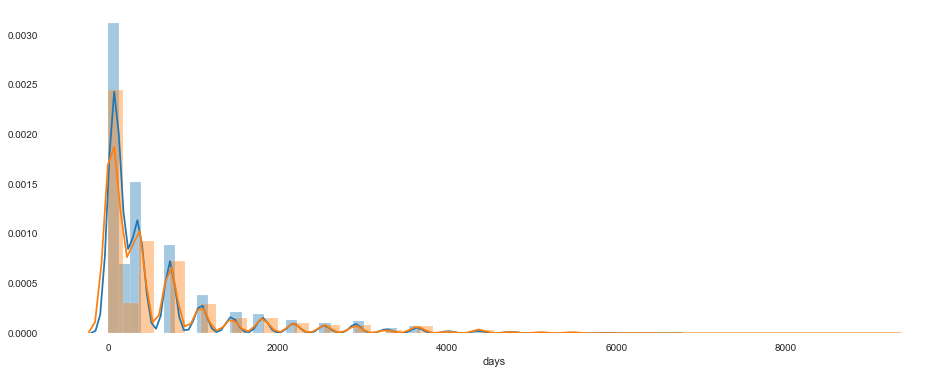

In [333]:
plt.figure(figsize=(16,6))
sns.distplot(adop_anim)
sns.distplot(trans_anim)

# Хотя визуально похожи графики, но сдвиг есть

In [334]:
adop_anim_month = data_result.query('outcome_type== "Adoption"')['month']
trans_anim_month = data_result.query('outcome_type== "Transfer"')['month']

In [335]:
print(trans_anim_month)

0        07
1        11
3        06
5        06
7        11
         ..
78203    01
78211    01
78214    01
78233    01
78234    01
Name: month, Length: 19548, dtype: object


In [336]:
trans_anim_month = pd.to_numeric(trans_anim_month)

In [337]:
adop_anim_month = pd.to_numeric(adop_anim_month)

In [338]:
ttest_ind(adop_anim_month, trans_anim_month)[1]
# p-value больше 0,05. Значит среднее значение этих двух выборок равно. 
# Получается, что от месяца рождения не зависит адоптация животного

0.05360283880699015

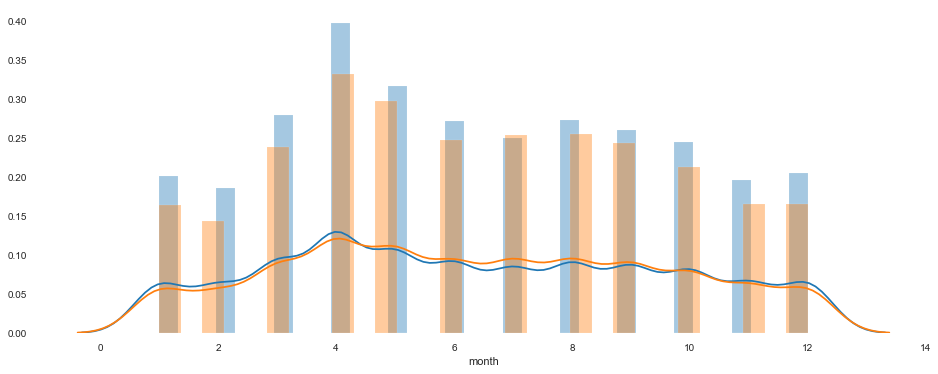

In [339]:
plt.figure(figsize=(16,6))
sns.distplot(adop_anim_month)
sns.distplot(trans_anim_month)

In [340]:
data_result.head()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month,days
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,07,14
1,1 year,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female,11,365
2,1 year,Dog,Pit Bull,Blue/White,other,Adoption,Neutered Male,03,365
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,06,3285
5,4 months,Dog,Leonberger Mix,Brown/White,Partner,Transfer,Intact Male,06,120


In [341]:
"""""
учитывая, что ранее проанализировала : month не влияет на outcome_type, 
            age_upon_outcome дублируются в корретной форме в days 
я уберу эти значения

"""""



'""\nучитывая, что ранее проанализировала : month не влияет на outcome_type, \n            age_upon_outcome дублируются в корретной форме в days \nя уберу эти значения\n\n'

In [342]:
color = data_result['color'].value_counts()
color.tail(25)

White/Calico Point           1
Tan/Brown Brindle            1
Blue/Yellow                  1
Tan/Brown Merle              1
Tortie/Black Smoke           1
Blue Cream/Blue Tiger        1
Cream Tabby/Cream Tabby      1
Red/Green                    1
Calico/Gray Tabby            1
Sable/Gray                   1
Black Smoke/Brown            1
Black Tabby/Orange           1
Red Tick/Blue Tick           1
Cream/Cream                  1
Orange Tiger                 1
Black Smoke/Blue Tick        1
Brown Tabby/Black Brindle    1
Liver/Cream                  1
Gray/Yellow                  1
Liver Tick/White             1
Liver/Brown Brindle          1
Agouti/Brown Tabby           1
Blue Merle/Gray              1
Cream/Red Tick               1
Agouti/White                 1
Name: color, dtype: int64

In [343]:
color.Black

5456

* не могу понять что нужно сделать , чтобы убрать столбцы со значением 1

In [344]:
data_result[data_result.color.str.contains('Black') ].head(20)

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month,days
9,3 months,Cat,Domestic Shorthair Mix,White/Black,Offsite,Adoption,Spayed Female,03,90
10,1 year,Cat,Domestic Medium Hair Mix,Black/White,other,Return to Owner,Spayed Female,03,365
11,2 years,Dog,Papillon/Border Collie,Black/White,Partner,Transfer,Neutered Male,02,730
12,2 months,Dog,Chihuahua Shorthair/Pomeranian,Black,Foster,Adoption,Neutered Male,03,60
14,8 years,Dog,Labrador Retriever Mix,Black,other,Return to Owner,Neutered Male,10,2920
15,2 years,Dog,Rat Terrier Mix,White/Black,Partner,Transfer,Neutered Male,06,730
17,3 weeks,Cat,Domestic Shorthair Mix,Black/White,Partner,Transfer,Intact Male,12,21
18,2 months,Dog,German Shepherd/Labrador Retriever,Black/White,Foster,Adoption,Spayed Female,10,60
21,5 months,Cat,Domestic Shorthair Mix,Black Tabby,other,Adoption,Neutered Male,03,150
24,1 year,Cat,Domestic Medium Hair Mix,Black/White,Partner,Transfer,Neutered Male,12,365


* Понимаю что есть парные цвета - White/Black и  Black/White, но это уменьшит количество всего на 2 или максимум 4 позиции. Надо что-то больше! 

In [345]:
data_result[data_result.sex_upon_outcome.str.contains('Male') ].head()
# как улучшить данную переменную sex_upon_outcome - не знаю


,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month,days
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male,07,14
2,1 year,Dog,Pit Bull,Blue/White,other,Adoption,Neutered Male,03,365
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male,06,3285
5,4 months,Dog,Leonberger Mix,Brown/White,Partner,Transfer,Intact Male,06,120
11,2 years,Dog,Papillon/Border Collie,Black/White,Partner,Transfer,Neutered Male,02,730


In [346]:
data_result[data_result.breed.str.contains('Pit Bul') ].head()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome,month,days
2,1 year,Dog,Pit Bull,Blue/White,other,Adoption,Neutered Male,03,365
16,1 year,Dog,Pit Bull Mix,Brown Brindle/White,Partner,Transfer,Neutered Male,03,365
47,2 years,Dog,Pit Bull Mix,Brown Merle/White,Partner,Transfer,Spayed Female,08,730
53,6 years,Dog,Pit Bull Mix,Black/White,Aggressive,Euthanasia,Spayed Female,05,2190
55,3 years,Dog,Pit Bull Mix,White/Brown,other,Return to Owner,Intact Female,02,1095


In [347]:
len(data_result[data_result.breed.str.contains('Pit Bul') ].head())

5

- Посмотрим несколько предсказаний
 - Предсказать адоптацию животного без РСА - 1077.65
 - Предсказание с РСА - 0.066990
 - Посмотрела ошибку предсказание без значений animal_type - 0.067
 - Посмотрела предсказание если оставить только Adoption ( метод работает :))

In [348]:
X_anim =data_result.drop(['outcome_type', 'animal_type'],axis=1)

# я посмотрю предсказание без этого столбца. Я предполагаю, что имея название породы можно сказать, что это за животное

In [349]:
X = data_result.drop(['outcome_type'],axis=1)
y = data_result['outcome_type']
y 



0        Transfer
1        Transfer
2        Adoption
3        Transfer
5        Transfer
           ...   
78250    Adoption
78251    Adoption
78252    Adoption
78254    Adoption
78255    Adoption
Name: outcome_type, Length: 63661, dtype: object

In [350]:
y = pd.get_dummies(y)
y.head()

,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1


In [351]:
X.head()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,sex_upon_outcome,month,days
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Intact Male,07,14
1,1 year,Dog,Beagle Mix,White/Brown,Partner,Spayed Female,11,365
2,1 year,Dog,Pit Bull,Blue/White,other,Neutered Male,03,365
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Neutered Male,06,3285
5,4 months,Dog,Leonberger Mix,Brown/White,Partner,Intact Male,06,120


In [352]:
X = pd.get_dummies(X)
X.head()

,days,age_upon_outcome_0 years,age_upon_outcome_1 day,age_upon_outcome_1 month,age_upon_outcome_1 week,age_upon_outcome_1 weeks,age_upon_outcome_1 year,age_upon_outcome_10 months,age_upon_outcome_10 years,age_upon_outcome_11 months,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,365,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,365,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3285,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,120,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [353]:
X.shape

(63661, 2583)

In [354]:
from sklearn.model_selection import train_test_split


In [355]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size =0.8)

In [356]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [357]:
estimator = LinearRegression()
estimator.fit(X_train,y_train)

predictions = estimator.predict(X_test)
print(mean_absolute_error(y_test,predictions))

0.06528565528982017


In [358]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 100)
X_new = pca.fit_transform(X)


In [359]:
X_new.shape

(63661, 100)

In [360]:
X_train, X_test, y_train , y_test = train_test_split(X_new,y, test_size =0.8)

In [361]:
estimator = LinearRegression()
estimator.fit(X_train,y_train)

predictions = estimator.predict(X_test)
print(mean_absolute_error(y_test,predictions))



0.07129649618417169


In [362]:
X_anim= pd.get_dummies(X_anim)
X_anim.head()

,days,age_upon_outcome_0 years,age_upon_outcome_1 day,age_upon_outcome_1 month,age_upon_outcome_1 week,age_upon_outcome_1 weeks,age_upon_outcome_1 year,age_upon_outcome_10 months,age_upon_outcome_10 years,age_upon_outcome_11 months,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,365,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,365,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3285,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,120,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [363]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 100)
X_anim = pca.fit_transform(X_anim)


In [364]:
X_train, X_test, y_train , y_test = train_test_split(X_anim,y, test_size =0.8)

In [365]:
estimator = LinearRegression()
estimator.fit(X_train,y_train)

predictions = estimator.predict(X_test)
print(mean_absolute_error(y_test,predictions))

# Ошибка предсказания стала даже немного больше без значений animal_type

0.06880213371723304


In [366]:
#  Интересно, а яесли я возьму только те, что адоптировались
X_ad = data_result[data_result['outcome_type'] =='Adoption']
y_ad = X_ad['outcome_type']


In [367]:
y_ad = pd.get_dummies(y_ad)
y_ad.head()

,Adoption
2,1
8,1
9,1
12,1
18,1


In [368]:

X_ad = pd.get_dummies(X_ad)
pca = PCA(n_components = 100)

X_ad_new = pca.fit_transform(X_ad)

In [369]:
X_ad_new.shape

(29154, 100)

In [370]:
X_train, X_test, y_train , y_test = train_test_split(X_ad_new,y_ad, test_size =0.2)

In [371]:
estimator = LinearRegression()
estimator.fit(X_train,y_train)

predictions = estimator.predict(X_test)
print(mean_absolute_error(y_test,predictions))


0.0


In [372]:
X = data.drop(['outcome_type'], axis=1)
y = data['outcome_type']

In [ ]:
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
#stand_scaler = StandardScaler()
#X_stand = stand_scaler.fit_transform(X)
#X_stand = pd.DataFrame(X_stand, columns=X.columns)
#X_stand.head(5)

In [ ]:
#correlation_matrix = data.corr().round(2)

#fig, ax = plt.subplots(figsize=(18,12)) 
#sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder

In [ ]:
#lencoder = LabelEncoder()
#ex_upon = lencoder.fit_transform(data['sex_upon_outcome'])
#sex_upon

In [ ]:
 #   X =data
#    y = data['']

 #   stand_scaler = StandardScaler()
 #   X_stand = stand_scaler.fit_transform(X)
#    X_stand = pd.DataFrame(X_stand, columns = X.columns)


In [ ]:
X =data
y = data['']

minmax_scaler = MinMaxScaler()
X_mm = minmax_scaler.fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns = X.columns)


# В этом случае значения от о до 1

In [ ]:
# Много данных будем использовать линейную регрессию 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [ ]:
# разделяем данные 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size =0.2, random_state=123)
X_train
X_test

In [ ]:
data[['RAD', 'MEDV']].corr()

In [ ]:
 # data.loc[(data['usecode'] == usecode) & (data['bedrooms'] == 0), 'bedrooms'] = data[data['usecode'] == usecode]['bedrooms'].median()

- data.shape
- lencoder.transform(data['z_address'][:10]) просмотреть 10 строк
- !pip install pandas_profiling ---- import pandas_profiling


- t_data = t_data.query('(bedrooms <= totalrooms) or (bathrooms <= totalrooms)') -  сортировака 
- data[data['animal_type']=='Bird']
-

- data['outcome_subtype']= data['outcome_subtype'].replace(np.nan, 'other')- замена nan на other
- data.drop([3754], inplace=True)
- df = df.loc[df['filmtv_ID']!=35647, :] - удаление олной строки

-  import math - 
    - math.ceil - округление числа в бОльшую сторону
    - math.floor - округление числа в меньшую сторону
    - t_data['bathrooms'] = t_data['bathrooms'].apply(math.ceil).astype(int)
    
- data.isnull().sum()
    - df['actors'].isnull().sum()
    - df[df['actors'].isnull()]
    - data = data.loc[pd.isnull(data['age_upon_outcome'])==False, :] - удаляем только строки пр этому столбцу
    - data[data['lastsoldprice'].isna()].shape
    
-  это одно значение, можем убрать его из расчетов, чтобы дальнейшие результаты не портило
        df = df.loc[df['Ladder']!=29, :]
    
- data.describe(include='all') - вместе с нулевыми значениями опишет
-  удаляем все строки где есть хоть один пропуск. Грубо, но сейчас можно - для графика нужны цифры
    - df = df.dropna()
    - print(df.shape)

- df.loc[df['duration'] > 5000, :] #  : означает что берем все колонки 
- iris.species.unique() - уникальность параметров в столбце

- np.round_(X.corr(), decimals=2)# округлили значение до двух значений  после запятой. Матрица корреляции
- data[data['usecode'] == 'MultiFamily2To4']['bedrooms'].median() - замена на среднее

-  удаляет дубликаты
    data.drop_duplicates(subset = ['animal_id'], keep = 'first', inplace = True)
    - Удаление дубликатов - data.drop_duplicates().shape 
- data_month = data_month.reset_index().head()


user_100 = (
    ratings
    .filter(items = ['userId', 'rating'])# только нужные столбцы
    .groupby('userId').count()#отсортировала по юзерам частоту
    .query('rating > 100')# беру тех кто  > 100
    
)

-  Заполнение медианой нулевых значений у типа постройки
    for usecode in zero_bed_data['usecode'].unique():
      data.loc[(data['usecode'] == usecode) & (data['bedrooms'] == 0), 'bedrooms'] = data[data['usecode'] == usecode]['bedrooms'].median()

In [ ]:
# merge the two DataFrames into one
df = pd.concat([input_df, submit_df])

# re-number the combined data set so there aren't duplicate indexes
df.reset_index(inplace=True)

# reset_index() generates a new column that we don't want, so let's get rid of it
df.drop('index', axis=1, inplace=True)

# the remaining columns need to be reindexed so we can access the first column at '0' instead of '1'
df = df.reindex_axis(input_df.columns, axis=1)

labelEnc = LabelEncoder()

## Sex
df['Sex'] = labelEnc.fit_transform(df['Sex'])

## Cabin
df['Cabin'][df.Cabin.isnull()] = 'U0'
df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
df['Room'] = df['Cabin'].map(lambda x: re.compile("([0-9]+)").search(x).group() if re.match('[0-9]', x) else 0).astype(
    int) + 1
df['Deck'] = labelEnc.fit_transform(df['Deck'])
 

## Fare
df['Fare'][np.isnan(df['Fare'])] = df['Fare'].median()
df['Fare'] = pd.qcut(df['Fare'], 4)
df['Fare'] = labelEnc.fit_transform(df['Fare'])

## Embarked
df['Embarked'][df.Embarked.isnull()] = df.Embarked.dropna().mode().values
df['Embarked'] = labelEnc.fit_transform(df['Embarked'])

## Name
df['Names'] = df['Name'].map(lambda x: len(re.split(' ', x)))
df['Title'] = df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

df['Title'][df.Title == 'Jonkheer'] = 'Master'
df['Title'][df.Title.isin(['Ms', 'Mlle'])] = 'Miss'
df['Title'][df.Title == 'Mme'] = 'Mrs'
df['Title'][df.Title.isin(['Capt', 'Don', 'Major', 'Col', 'Sir'])] = 'Sir'
df['Title'][df.Title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
df['Title'] = labelEnc.fit_transform(df['Title'])

df.drop(['Name'], axis=1, inplace=True)


## Ticket
def processTicket(df):
    global labelEnc
    # extract and massage the ticket prefix
    df['TicketPrefix'] = df['Ticket'].map(lambda x: getTicketPrefix(x.upper()))
    df['TicketPrefix'] = df['TicketPrefix'].map(lambda x: re.sub('[.?/?]', '', x))
    df['TicketPrefix'] = df['TicketPrefix'].map(lambda x: re.sub('STON', 'SOTON', x))

    # factorize the prefix to create a numerical categorical variable
    df['TicketPrefix'] = labelEnc.fit_transform(df['TicketPrefix'])

    # extract the ticket number
    df['TicketNumber'] = df['Ticket'].map(lambda x: getTicketNumber(x))

    # create a feature for the number of digits in the ticket number
    df['TicketNumberDigits'] = df['TicketNumber'].map(lambda x: len(x)).astype(np.int)

    # create a feature for the starting number of the ticket number
    df['TicketNumberStart'] = df['TicketNumber'].map(lambda x: x[0:1]).astype(np.int)

    # The prefix and (probably) number themselves aren't useful
    df.drop(['Ticket', 'TicketNumber'], axis=1, inplace=True)


def getTicketPrefix(ticket):
    match = re.compile("([a-zA-Z./]+)").search(ticket)
    if match:
        return match.group()
    else:
        return 'U'


def getTicketNumber(ticket):
    match = re.compile("([0-9]+$)").search(ticket)
    if match:
        return match.group()
    else:
        return '0'


processTicket(df)


## Ages
def setMissingAges(df):
    # Grab all the features that can be included in a Random Forest Regressor
    age_df = df[['Age', 'Sex', 'Embarked', 'Fare', 'Parch', 'SibSp', 'Title', 'Names', 'Pclass', 'Deck', 'Room',
                 'TicketPrefix', 'TicketNumberDigits', 'TicketNumberStart']]

    # Split into sets with known and unknown Age values
    knownAge = age_df.loc[(df.Age.notnull())]
    unknownAge = age_df.loc[(df.Age.isnull())]

    # All age values are stored in a target array
    y = knownAge.values[:, 0]

    # All the other values are stored in the feature array
    X = knownAge.values[:, 1::]

    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)

    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(unknownAge.values[:, 1::])

    # Assign those predictions to the full data set
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    return df


df = setMissingAges(df)
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df['Age'].reshape(-1, 1))
df.drop(['Age'], axis=1, inplace=True)

numerics = df.loc[:, ['Age_scaled', 'Sex', 'Fare', 'Pclass', 'Parch', 'SibSp', 'Embarked',
                      'Names', 'Deck', 'Room', 'Title', 'TicketPrefix', 'TicketNumberDigits', 'TicketNumberStart']]

for i in range(0, numerics.columns.size - 1):
    for j in range(0, numerics.columns.size - 1):
        col1 = str(numerics.columns.values[i])
        col2 = str(numerics.columns.values[j])
        # multiply fields together (we allow values to be squared)
        if i <= j:
            name = col1 + "*" + col2
            df = pd.concat([df, pd.Series(numerics.iloc[:, i] * numerics.iloc[:, j], name=name)], axis=1)
        # add fields together
        if i < j:
            name = col1 + "+" + col2
            df = pd.concat([df, pd.Series(numerics.iloc[:, i] + numerics.iloc[:, j], name=name)], axis=1)
        # divide and subtract fields from each other
        if not i == j:
            # name = col1 + "/" + col2
            # df = pd.concat([df, pd.Series(numerics.iloc[:, i] / numerics.iloc[:, j], name=name)], axis=1)
            name = col1 + "-" + col2
            df = pd.concat([df, pd.Series(numerics.iloc[:, i] - numerics.iloc[:, j], name=name)], axis=1)

# calculate the correlation matrix (ignore survived and passenger id fields)
df_corr = df.drop(['Survived', 'PassengerId'], axis=1).corr(method='spearman')

# create a mask to ignore self-
mask = np.ones(df_corr.columns.size) - np.eye(df_corr.columns.size)
df_corr = mask * df_corr

drops = []
# loop through each variable
for col in df_corr.columns.values:
    # if we've already determined to drop the current variable, continue
    if np.in1d([col], drops):
        continue

    # find all the variables that are highly correlated with the current variable
    # and add them to the drop list
    corr = df_corr[abs(df_corr[col]) > 0.95].index
    drops = np.union1d(drops, corr)

df.drop(drops, axis=1, inplace=True)
df.drop(['PassengerId'], axis=1, inplace=True)

# pca = PCA(n_components=0.99)
#
# pca.fit_transform()

print('Training...')
# features_list = df.columns.values[1::]
# 890
X = df.values[0:890, 1::]
y = df.values[0:890, 0]
X_test = df.values[891::, 1::]

params={
    'booster':'gbtree',
    'objective': 'binary:logistic',
    'max_depth':5,
    'subsample':0.9,
    'colsample_bytree': 0.6,
    'eta':0.03,
    'silent':0,
    'seed': 1234,
    'nthread': 2
}

xgtrain = xgb.DMatrix(X, label=y)
xgtest = xgb.DMatrix(X_test)

num_rounds = 200
xgb_model = xgb.train(params, xgtrain, num_rounds)
results = xgb_model.predict(xgtest)
results[results>=0.5] = 1
results[results<0.5]=0

submission = pd.DataFrame({
    "PassengerId": list(range(892, len(results) + 892)),
    "Survived": results.astype(np.int16)
})
submission.to_csv('titanic.csv', index=False)

Albania1987 - вот это значение в столбце переведет отдельно а Albania и 1987
с помощью 
     - data['new'] = data['old'].str[:-4]
     -data['new-2'] = data['old'].ste[-4:]
   или 
    - data['old'].str.extract('([A-Za-z]+)(\d+)')  - (это албания)
    - data['new-2] = data['old'].str.extract('(\d+\.?\d*)')  - это год
    

- здесь удалим значения, которые по value_counts меньше чем нам требуется( мы решили) 
    - ther = 100
    counts = df.country.value_counts()
    freq = counts[counts <= ther].index
    countries = pd.get_dummies(df.country.replace(freq, 'uncommon'))

In [ ]:
# посмотрим корреляцию между переменными (взяла из разбора лабораторной)
plt.figure(figsize = (15,15))
corr =data_result.corr()
mask= np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(
    data=corr,
    mask=mask,
    annot=True,
    cmap='RdYlGn',
    fmt="0.2%",
    linewidths=0.2,
    square=True,
    center=0
)
plt.tight_layout()
plt.show()

#   Интересное представление графика! 

#  Но зависимость все та же , что мы видели и описывала ранее. 
# Только сейчас появилась обратная корреляция  между suicides/100k pop и sex. Но я думаю, это не очем нам не говорит